<h4>Q-1</h4>

In [9]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
file = open("spamham.csv","r")
data = file.readlines()
labels = []
ind = 0
sc = 0
for ind in range(len(data)):
    if(data[ind][0:4] == "spam"):
        data[ind] = data[ind].replace("spam ","")
        labels += ["spam"]
        sc = sc+1
    else:
        labels += ["ham"]
        data[ind] = data[ind].replace("ham ","")
data = np.array(data)
labels = np.array(labels)
data = np.vstack((data, labels)).T
print(data.shape)
#print(data[:5])

FileNotFoundError: [Errno 2] No such file or directory: 'spamham.csv'

In [11]:
punc = string.punctuation           
sw = stopwords.words('english') 
for record in data:
        for item in punc:
            record[0] = record[0].replace(item, "")
        splittedWords = record[0].split()
        newText = ""
        for word in splittedWords:
            if word not in sw:
                word = word.lower()
                newText = newText + " " + word  
        record[0] = newText
print(data[0])

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Harmanjot Kaur/nltk_data'
    - 'C:\\Users\\Harmanjot Kaur\\anaconda3\\nltk_data'
    - 'C:\\Users\\Harmanjot Kaur\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Harmanjot Kaur\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Harmanjot Kaur\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [14]:
features = data[:, 0]   
labels = data[:, 1]     
print(labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.27, random_state = 42)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [15]:
pipe = Pipeline(steps=[('vectorize', CountVectorizer(ngram_range=(1, 1), token_pattern=r'\b\w+\b')),
                       ('classifier', MultinomialNB())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorize', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('classifier', MultinomialNB())])

0.9966777408637874


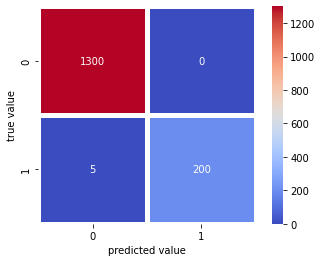

In [20]:
y_predict = pipe.predict(X_test)

print(accuracy_score(y_test, y_predict))
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

<h4>Q-2</h4>

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
class NaiveBayes:
    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        # get number of uniques classes
        self.n_classes = len(np.unique(y))
        
        # create three zero-matrices to store summary stats & prior
        self.mean = np.zeros((self.n_classes, self.n_features))
        self.variance = np.zeros((self.n_classes, self.n_features))
        self.priors = np.zeros(self.n_classes)

        for c in range(self.n_classes):
            # create a subset of data for the specific class 'c'
            X_c = X[y == c]
            
            # calculate statistics and update zero-matrices, rows=classes, cols=features
            self.mean[c, :] = np.mean(X_c, axis=0)
            self.variance[c, :] = np.var(X_c, axis=0)
            self.priors[c] = X_c.shape[0] / self.n_samples
    def gaussian_density(self, x, mean, var):
        # implementation of gaussian density function
        const = 1 / np.sqrt(var * 2 * np.pi)
        proba = np.exp(-0.5 * ((x - mean) ** 2 / var))
        return const * proba
    
    def get_class_probability(self, x):
        # store new posteriors for each class in a single list
        posteriors = list()

        for c in range(self.n_classes):
            # get summary stats & prior
            mean = self.mean[c]
            variance = self.variance[c]
            prior = np.log(self.priors[c])
            
            # calculate new posterior & append to list
            posterior = np.sum(np.log(self.gaussian_density(x, mean, variance)))
            posterior = prior + posterior
            posteriors.append(posterior)
        
        # return the index with the highest class probability
        return np.argmax(posteriors)
    
    def predict(self, X):
        # for each sample x in the dataset X
        y_hat = [self.get_class_probability(x) for x in X]
        return np.array(y_hat)

In [7]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# instantiate, train and predict Custom Naive Bayes Classifier
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

# instantiate, train and predict sklearn Naive Bayes Classifier
clf = GaussianNB()
clf.fit(X_train, y_train)
y_predict  = clf.predict(X_test)

# helper function to calculate accuracy
def get_accuracy(y_true, y_hat):
    return np.sum(y_true==y_hat) / len(y_true)
  
# print results
print('custom Gaussian Naive Bayes Accuracy: ', get_accuracy(y_test, predictions))
print('sklearn Gaussian naive bayes accuracy: ',accuracy_score(y_test, y_predict))

custom Gaussian Naive Bayes Accuracy:  0.9666666666666667
sklearn Gaussian naive bayes accuracy:  0.9666666666666667
